In [6]:
import pandas as pd


In [7]:
df = pd.read_csv("../ames/test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
arr1 = df.columns.values
arr2 = df.columns.values

In [5]:
arr1 = pd.Series(df.columns.values).str.lower()
arr2 = pd.Series(df.columns.values).str.lower()

In [9]:
arr1

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [10]:
from similarity.normalized_levenshtein import NormalizedLevenshtein
normalized_levenshtein = NormalizedLevenshtein()

In [11]:
ontology = pd.Series(['Exterior', 'Porch', 'Garage'])
ontology

0    Exterior
1       Porch
2      Garage
dtype: object

In [12]:
from similarity.normalized_levenshtein import NormalizedLevenshtein
normalized_levenshtein = NormalizedLevenshtein()

In [23]:
vectors = pd.DataFrame([[normalized_levenshtein.distance(word, field) for word in ontology] for field in arr1])

In [14]:
from sklearn.cluster import KMeans
clusters = len(ontology) + 1
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(vectors)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(vectors)
pc = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
pc.head()

import matplotlib.pyplot as plt
plt.scatter(pc['pc1'], pc['pc2'], c=kmeans.labels_)
plt.show()

<Figure size 640x480 with 1 Axes>

In [16]:
import numpy as np

def dist(x, y): # computationally effcient
    return np.sqrt(np.dot(x, x) - 2 * np.dot(x, y) + np.dot(y, y))

def mean_dist(DF, X):
    dists = DF.apply(dist, args=(X, ), axis=1)
    return dists.mean()

In [17]:
#pd.DataFrame(vectors)[1] #kmeans.labels_

In [18]:
for i in range(clusters):
    print("Cluster " + str(i) + ":")
    print("Mean Dist to Centroid: ")
    print(mean_dist(vectors[kmeans.labels_==i], 
                    kmeans.cluster_centers_[i]))
    
    print(pd.Series(arr1[kmeans.labels_==i]))
    print('\n')

Cluster 0:
Mean Dist to Centroid: 
0.1437996244187957
0      LotFrontage
1       MasVnrType
2       MasVnrArea
3       Fireplaces
4      FireplaceQu
5       GarageType
6      GarageYrBlt
7     GarageFinish
8       GarageCars
9       GarageArea
10      GarageQual
11      GarageCond
dtype: object


Cluster 1:
Mean Dist to Centroid: 
0.169235472077862
0           LotArea
1            Street
2          LotShape
3        Electrical
4      KitchenAbvGr
5       KitchenQual
6        PavedDrive
7       OpenPorchSF
8     EnclosedPorch
9         3SsnPorch
10      ScreenPorch
11         PoolArea
12           PoolQC
13            Fence
dtype: object


Cluster 2:
Mean Dist to Centroid: 
0.11533674891921138
0                Id
1        MSSubClass
2          MSZoning
3             Alley
4       LandContour
5         Utilities
6         LotConfig
7         LandSlope
8      Neighborhood
9        Condition1
10       Condition2
11         BldgType
12       HouseStyle
13      OverallQual
14      OverallCon

In [24]:
from sklearn.cluster import AgglomerativeClustering

clusters = len(ontology) + 1
agg = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=clusters,
            pooling_func='deprecated').fit(vectors)

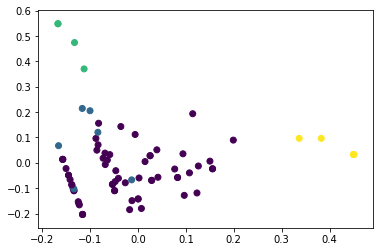

In [25]:
plt.scatter(pc['pc1'], pc['pc2'], c=agg.labels_)
plt.show()

In [61]:

unclassified_index = pd.Series([vectors[agg.labels_ == i].mean().min() for i in range(clusters)]).idxmax()

for i in range(clusters):
    print("Cluster " + str(i) + ":")
    print("Unclassified" if i == unclassified_index else ontology[vectors[agg.labels_ == i].mean().idxmin()])
    
    print(pd.Series(arr1[agg.labels_==i]))
    
    print('\n')

Cluster 0:
Unclassified
0                Id
1        MSSubClass
2          MSZoning
3       LotFrontage
4           LotArea
5            Street
6             Alley
7          LotShape
8       LandContour
9         Utilities
10        LotConfig
11        LandSlope
12     Neighborhood
13       Condition1
14       Condition2
15         BldgType
16       HouseStyle
17      OverallQual
18      OverallCond
19        YearBuilt
20     YearRemodAdd
21        RoofStyle
22         RoofMatl
23       MasVnrType
24       MasVnrArea
25       Foundation
26         BsmtQual
27         BsmtCond
28     BsmtExposure
29     BsmtFinType1
          ...      
33        BsmtUnfSF
34      TotalBsmtSF
35          Heating
36        HeatingQC
37       CentralAir
38       Electrical
39         1stFlrSF
40         2ndFlrSF
41     LowQualFinSF
42        GrLivArea
43     BsmtFullBath
44     BsmtHalfBath
45         FullBath
46         HalfBath
47     BedroomAbvGr
48     KitchenAbvGr
49      KitchenQual
50     TotRmsAbv